### Importing required libraries

In [372]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [373]:
train_path = r"G:/kaggle/mnist/train.csv"

In [374]:
df= pd.read_csv(train_path)

In [375]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# There are 784 pixels in each image ( 28x28=784) 

In [376]:
image = df.iloc[1].drop("label")
image

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 784, dtype: int64

In [377]:
image = np.array(image).reshape(28,28)

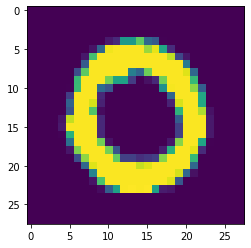

In [378]:
plt.imshow(image)

In [379]:
# Thats a zero, lets check it on label column if its showing a 0

print(df.iloc[1].label)

0


4


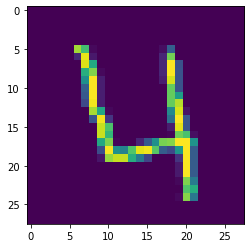

In [380]:
image = df.iloc[3].drop("label")
image = np.array(image).reshape(28,28)
plt.imshow(image)
print(df.iloc[3].label)

# So far so good

# To have a better accuracy we will do image augmentation by shifting left right up and down the data

In [381]:
right_shifted = pd.DataFrame(image).shift(2,axis=1,fill_value=0)

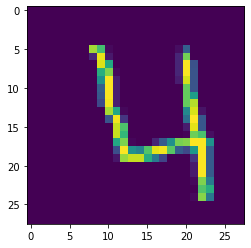

In [382]:
plt.imshow(right_shifted)

In [383]:
left_data = []
right_data=[]
up_data=[]
down_data=[]
same_data = [] 

In [384]:
len(df)

42000

In [385]:
for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(-2,axis=1,fill_value=0)
    image = np.array(image).reshape(-1,1)
    left_data.append(image)

for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(2,axis=1,fill_value=0)
    image = np.array(image).reshape(-1,1)
    right_data.append(image)
    
for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(-2,axis=0,fill_value=0)
    image = np.array(image).reshape(-1,1)
    up_data.append(image)
    
for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(2,axis=0,fill_value=0)
    image = np.array(image).reshape(-1,1)
    down_data.append(image)
    
for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(0,axis=0,fill_value=0)
    image = np.array(image).reshape(-1,1)
    same_data.append(image)

KeyboardInterrupt: 

In [ ]:
left_data =np.array(left_data).reshape(len(df),len(df.iloc[0].drop("label")))
left_data=pd.DataFrame(left_data)

right_data=np.array(right_data).reshape(len(df),len(df.iloc[0].drop("label")))
right_data=pd.DataFrame(right_data)

up_data=np.array(up_data).reshape(len(df),len(df.iloc[0].drop("label")))
up_data=pd.DataFrame(up_data)

down_data=np.array(down_data).reshape(len(df),len(df.iloc[0].drop("label")))
down_data=pd.DataFrame(down_data)

same_data = np.array(same_data).reshape(len(df),len(df.iloc[0].drop("label")))
same_data = pd.DataFrame(same_data)

In [ ]:
left_data["label"] = df["label"]
right_data["label"] = df["label"]
up_data["label"] = df["label"]
down_data["label"] = df["label"]
same_data["label"]=df["label"]

In [ ]:
left_data.head()

In [ ]:
data_frames = [same_data,left_data,right_data,up_data,down_data]

In [ ]:
final_df = pd.concat(data_frames)

In [ ]:
final_df.head()

In [ ]:
final_df.shape

#  Now our dataset size is 5x which will make training a bit slow but it will have better accuracy in test phase

In [ ]:
x= final_df.drop(["label"],axis=1)
y=final_df["label"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2021)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=-1, random_state=None, verbose=3, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# Here i have split the dataset into train and test but it is not necessary because in random forest classifier i will use out of bag evaluation, which works like cross validation score.

In [ ]:
forest.fit(xtrain,ytrain)


In [ ]:
forest.oob_score_

# Now saving the model first and then submitting the results in kaggle

In [ ]:
parameters = [ 
{
    'n_estimators':[30], 'criterion':['gini'], 'max_depth':[5], 'bootstrap':[True], 'oob_score':[True], 'n_jobs':[-1], 'random_state':[None], 'verbose':[3],
"min_samples_split":[2,4,6,8,10,12],"min_samples_leaf":[1,2,4,6,8,10,12],"max_leaf_nodes":[1,10,5]
}]



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
randm_search =  RandomizedSearchCV(estimator=forest,param_distributions=parameters,n_iter=5,cv=3,scoring="accuracy")

In [ ]:
randm_search.fit(x,y)

In [ ]:
randm_search.best_params_

In [ ]:
forest = RandomForestClassifier(n_estimators=1000,  criterion='gini', max_depth=50, min_samples_split=8, min_samples_leaf=2,  max_leaf_nodes=10, bootstrap=True, oob_score=False, n_jobs=-1, random_state=2021, verbose=3, )

In [ ]:
forest.fit(x,y)

In [ ]:
forest.oob_score_

#  oob score is very less when used randomized search parameters because the n_estimators and max_depth used in randomized search cv are not the best.  Also it takes more time for randomized search cv because we have increased the size of data to 5x.  Hence we will not use the parameters achieved from hyperparameter tuning.

# Now creating final model 

In [ ]:
forest = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=50, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=-1, random_state=2021, verbose=3, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [ ]:
forest.fit(x,y)

In [ ]:
forest.oob_score_

# The model is not saved because the size of model is big which takes much time for saving the model

In [ ]:
test_path = r'G:\kaggle\mnist\test.csv'

In [ ]:
test_df  = pd.read_csv(test_path)
test_df.columns= same_data.columns.drop("label")

In [ ]:
test_df.head()

In [ ]:
result = forest.predict(test_df)

In [ ]:
submission_path = r'G:/kaggle/mnist/Submission.csv'

In [ ]:
submission = pd.read_csv(submission_path)

In [ ]:
submission.head()

In [ ]:
submission["Label"] = result

In [ ]:
submission.head()

In [524]:
submission.to_csv(r'G:\kaggle\mnist\submission.csv',index=None)

# After uploading it to kaggle competition it got score of 97.37% and rank of 4533.  Not bad :)

In [525]:
manual_test_file_path = r'G:/kaggle/mnist/manual_testing/number.jpg'

In [526]:
from PIL import Image
from numpy import array
im_1 = Image.open(r'G:/kaggle/mnist/manual_testing/number.jpg')
img = np.array(im_1)

In [527]:
img1 = img[:,:,0]*0.2989 
img2 = img[:,:,1]*0.5870 
img3 = img[:,:,2]*0.1140 
img = img1+img2+img3

In [528]:
img

array([[  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,

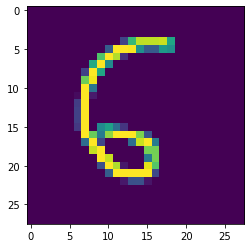

In [531]:
plt.imshow(img)

In [532]:
import cv2 as cv

In [533]:
test_image = (np.array(img)).reshape(1,-1)
test_image.shape

(1, 784)

In [534]:
forest.predict(test_image)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.1s finished


array([6], dtype=int64)